Investment Analysis for Spark Fund

In [61]:
import pandas as pd
import numpy as np

#reading companies dataframe
companies = pd.read_csv('companies.txt',sep="\t", encoding="ISO-8859-1")
companies['permalink'] = companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore').upper())

#reading rounds2 dataframe
rounds2 = pd.read_csv('rounds2.csv',encoding = 'unicode_escape')
rounds2['company_permalink'] = rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore').upper())


In [62]:
print(round(100*companies.isnull().sum()/len(companies.index),2))
companies.describe()

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/ORGANIZATION/BBOXX,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [63]:
#imputing missing values in companies data

companies['homepage_url']=companies['homepage_url'].fillna(companies['homepage_url'].mode().values[0])
companies['category_list']=companies['category_list'].fillna(companies['category_list'].mode().values[0])
companies['country_code']=companies['country_code'].fillna(companies['country_code'].mode().values[0])
companies['state_code']=companies['state_code'].fillna(companies['state_code'].mode().values[0])
companies['region']=companies['region'].fillna(companies['region'].mode().values[0])
companies['city']=companies['city'].fillna(companies['city'].mode().values[0])
companies['founded_at']=companies['founded_at'].fillna(companies['founded_at'].mode().values[0])
print(round(100*companies.isnull().sum()/len(companies.index),2))

permalink        0.0
name             0.0
homepage_url     0.0
category_list    0.0
status           0.0
country_code     0.0
state_code       0.0
region           0.0
city             0.0
founded_at       0.0
dtype: float64


In [64]:
#checing nan values distribution in rounds2 dataframe
print(round(100*rounds2.isnull().sum()/len(rounds2.index),2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64


In [65]:
#deleting the column as it contains a lot of missing values
del rounds2['funding_round_code']
#removing rows where raised amount is nan
rounds2 = rounds2[pd.notnull(rounds2['raised_amount_usd'])]
print(round(100*rounds2.isnull().sum()/len(rounds2.index),2))

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64


**CHECKPOINT 1**

In [66]:
#Question 1 Checkpoint 1
print(len(companies['permalink'].unique().tolist()))
#Question 2 Checkpoint 1
print(len(rounds2['company_permalink'].unique().tolist()))
#Question 3 Checkpoint 1
rounds2['company_permalink'].isin(companies['permalink']).value_counts()

66368
53915


True    94959
Name: company_permalink, dtype: int64

After Cleaning the data no. of unique companies in rounds 2 changes as we got rid of the rows where raised_amount_usd = NaN


In [67]:
#merging is done after cleaning and imputing data. I am doing a left merge here as I believe that entire companies data should be present
master_frame = pd.merge(left=companies, right=rounds2, how='inner', left_on='permalink', right_on= 'company_permalink')
master_frame.shape

(94959, 15)

In [68]:
master_frame.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,01-01-2012,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,http://www.01games.hk/,Games,operating,HKG,CA,Hong Kong,Hong Kong,01-01-2012,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0


In [69]:
master_frame.isnull().sum()
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

permalink                  0.0
name                       0.0
homepage_url               0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
founded_at                 0.0
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [70]:
#deleting the column company_permalink as it duplicates permalink
del master_frame['company_permalink']


**CHECKPOINT 2**

In [71]:
#grouping by funding type to get most invested type. This will be used further for checkpoint 6
group_by_type=master_frame.groupby(['funding_round_type'],as_index=False).agg({'raised_amount_usd':['sum','mean']})
group_by_type.columns = ['funding_round_type', 'sum','mean']
group_by_type['fraction %'] = group_by_type['sum'].apply(lambda x : 100*x/(group_by_type['sum'].sum()))
group_by_type

,funding_round_type,sum,mean,fraction %
0,angel,4.659255e+09,9.586945e+05,0.470572
1,convertible_note,2.103126e+09,1.453439e+06,0.212410
2,debt_financing,1.138848e+11,1.704353e+07,11.502066
3,equity_crowdfunding,6.611162e+08,5.383682e+05,0.066771
4,grant,9.134424e+09,4.300576e+06,0.922553
5,non_equity_assistance,3.001782e+07,4.112031e+05,0.003032
6,post_ipo_debt,2.564309e+10,1.687046e+08,2.589884
7,post_ipo_equity,5.161061e+10,8.218249e+07,5.212534
8,private_equity,1.419254e+11,7.330859e+07,14.334092
9,product_crowdfunding,5.261686e+08,1.363131e+06,0.053142


**CheckPoint 3**

In [72]:
#filter the dataframe. Now it contains data for only Venture investment type
master_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']
master_frame.shape

(50228, 14)

In [73]:
master_frame.describe(include='all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
count,50228,50228,50228,50228,50228,50228,50228,50228,50228,50228,50228,50228,50228,5.022800e+04
unique,29302,29260,27192,10557,4,97,257,796,2968,2071,50228,1,4436,NaN
top,/ORGANIZATION/ENDOGASTRIC-SOLUTIONS,EndoGastric Solutions,http://www.askforoffer.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/37c5067795c415fdd498f6a31f1f8163,venture,01-01-2008,NaN
freq,14,14,2615,5512,36637,38256,16893,13041,5874,11156,1,50228,178,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.174895e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.635207e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600902e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+07


In [74]:
master_frame.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,01-01-2012,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
8,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0


**WEB Scraping for finding out the countries whose official language is ENGLISH**

In [75]:
#scraping data for official languages from wiki
wiki_languages = pd.read_html("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language")

#extracting the table that we need for analysis
english_countries_1 = wiki_languages[0]
english_countries_2 = wiki_languages[1]

#merging the 2 tables to consolidate countries where english is official language
english_speaking_countries=english_countries_1.append(english_countries_2, ignore_index=True,sort=False)
english_speaking_countries.shape

(61, 7)

In [76]:
#finding top 9 countries with max investment amount
top9=master_frame.groupby(['country_code'],as_index=False).sum().sort_values(by=['raised_amount_usd'],ascending=False).iloc[0:9,:]
top9

,country_code,raised_amount_usd
94,USA,4.480170e+11
15,CHN,3.983542e+10
29,GBR,2.024563e+10
39,IND,1.439186e+10
12,CAN,9.583332e+09
28,FRA,7.259537e+09
42,ISR,6.907515e+09
21,DEU,6.346960e+09
45,JPN,3.363677e+09


In [77]:
#selecting countries from top 9 where english is the official language
top9['country_code'].isin(english_speaking_countries['Alpha-3 code'])


94     True
15    False
29     True
39     True
12     True
28    False
42    False
21    False
45    False
Name: country_code, dtype: bool

**Top English Speaking Country - USA**

**Second English speaking country GBR**


**Third English speaking country - IND**

---



**CHECKPOINT 4**

---



In [78]:
#selecting data from master_frame for the top 3 countries
master_frame = master_frame.loc[(master_frame['country_code'] == 'USA') | (master_frame['country_code'] == 'GBR') | (master_frame['country_code'] == 'IND') ]
master_frame.tail(100)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
94743,/ORGANIZATION/ZOUNDS-HEARING-AIDS,Zounds Hearing Aids,http://zoundsmiddletown.com/,Health Care,operating,USA,AZ,Phoenix,Tempe,01-01-2012,/funding-round/fe8d9270c31e481f1a00f76ec82e8203,venture,22-05-2014,10000000.0
94749,/ORGANIZATION/ZOZI,ZOZI,http://www.zozi.com,E-Commerce|Marketplaces|Online Rental|SaaS|Tou...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2008,/funding-round/4980d294c900b0e1c54d3816c2b22b9b,venture,01-07-2015,30000000.0
94751,/ORGANIZATION/ZOZI,ZOZI,http://www.zozi.com,E-Commerce|Marketplaces|Online Rental|SaaS|Tou...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2008,/funding-round/d170f056fe58cdb4815ec775652b73de,venture,30-08-2010,3000000.0
94752,/ORGANIZATION/ZOZI,ZOZI,http://www.zozi.com,E-Commerce|Marketplaces|Online Rental|SaaS|Tou...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2008,/funding-round/f6ecc947ca974bd349f098ccc4d52e6b,venture,01-03-2011,10000000.0
94753,/ORGANIZATION/ZPERFECTGIFT,zPerfectGift,http://www.askforoffer.com,Social Media,operating,USA,UT,Salt Lake City,Midvale,01-01-2010,/funding-round/725033cf27c8860522357fd7330252c6,venture,26-09-2012,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94932,/ORGANIZATION/ZYOMYX-INC,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0
94934,/ORGANIZATION/ZYOMYX-INC,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0
94935,/ORGANIZATION/ZYOMYX-INC,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0
94945,/ORGANIZATION/ZYRRA,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,01-01-2012,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0


In [80]:
#getting the uploaded file in a dataframe
mapping = pd.read_csv('mapping.csv',encoding = 'ISO-8859-1')
mapping.shape

(688, 10)

In [81]:
#check for nan values 
round(100*mapping.isnull().sum()/len(mapping.index),2)

category_list                              0.15
Automotive & Sports                        0.00
Blanks                                     0.00
Cleantech / Semiconductors                 0.00
Entertainment                              0.00
Health                                     0.00
Manufacturing                              0.00
News, Search and Messaging                 0.00
Others                                     0.00
Social, Finance, Analytics, Advertising    0.00
dtype: float64

In [82]:
#removing rows with null values
mapping = mapping[pd.notnull(mapping['category_list'])]

In [83]:
#splitting the category_list names as per business rule and keeping only till the first occurence of '|'
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x : x.split("|",1)[0])
master_frame.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,01-01-2012,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,Apps
8,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
9,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
16,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
22,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education
27,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,Curated Web
31,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,Curated Web
32,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,Curated Web


In [84]:
#understanding mapping data
mapping.tail(50)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
638,Taxis,0,0,0,0,0,0,0,1,0
639,Tea,0,0,0,0,0,0,0,1,0
640,Technology,0,0,0,0,0,0,0,1,0
641,Telecommunications,0,0,0,0,0,0,0,1,0
642,Television,0,0,0,1,0,0,0,0,0
643,Textiles,0,0,0,0,0,0,0,1,0
644,Theatre,0,0,0,1,0,0,0,0,0
645,Therapeutics,0,0,0,0,1,0,0,0,0
646,Ticketing,0,0,0,1,0,0,0,0,0
647,Tourism,0,0,0,1,0,0,0,0,0


In [85]:
#somehow the na is replaced by 0 . need to fix that
mapping['category_list'] = mapping['category_list'].astype(str).apply(lambda x: x.replace('0','na'))

In [86]:
#Using melt function to get sectors in a column against their value i.e. 0 or 1
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'])

In [87]:
#selecting only those rows where the values is 1 i.e retrieving sector against each category
mapping = mapping[mapping['value']==1]
mapping.tail(10)


,category_list,variable,value
6107,Social Media Management,"Social, Finance, Analytics, Advertising",1
6108,Social Media Marketing,"Social, Finance, Analytics, Advertising",1
6109,Social Media Platforms,"Social, Finance, Analytics, Advertising",1
6110,Social Network Media,"Social, Finance, Analytics, Advertising",1
6111,Social News,"Social, Finance, Analytics, Advertising",1
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1
6158,Venture Capital,"Social, Finance, Analytics, Advertising",1


In [88]:
#deleting the column value from mapping dataframe as it has no significamce now
del mapping['value']
#checking if the column has deleted
mapping.shape

(687, 2)

In [89]:
#checking if master frame contains any sectors which are not there in mappings data
master_frame['primary_sector'].isin(mapping['category_list']).value_counts()

True     40966
False      169
Name: primary_sector, dtype: int64

In [90]:
#merging master frame withmappings to map primary sector with maon sector
master_frame = pd.merge(master_frame, mapping, how='inner', left_on='primary_sector',right_on='category_list')


In [91]:
master_frame.columns
#removing unnecessary column that came beacuse of merge
del master_frame['category_list_y']

#renaming columns of master_frame
master_frame.rename(columns = {'variable': 'main_sector','category_list_x':'category_list'}, inplace = True)  
      

In [92]:
#checking if master_frame contains null values
master_frame.isnull().sum()

permalink                  0
name                       0
homepage_url               0
category_list              0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
founded_at                 0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
primary_sector             0
main_sector                0
dtype: int64

In [93]:
master_frame.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,01-01-2012,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment


**Finding table values in D1 i.e. USA**

In [94]:
#extracting dataframe D1 for USA
D1 = master_frame.loc[(master_frame['country_code'] == "USA") & (master_frame['raised_amount_usd'] >= 5000000 ) & ( master_frame['raised_amount_usd']<= 15000000)]
#this gives the total no. of investments in USA
D1.shape


(12800, 16)

In [95]:
#total amount of investment in USA
D1['raised_amount_usd'].sum()

114253598307.0

In [96]:
#grouping by main sector and finding sum and count
group_D1 = D1.groupby(['main_sector'], as_index=False).agg({'raised_amount_usd' : ['sum','count']})
#flattening the column names
group_D1.columns = ['%s%s' % (a, '|%s' % b if b else '') for a, b in group_D1.columns]
#checking the data
group_D1.sort_values(['raised_amount_usd|count'], ascending=[0])

,main_sector,raised_amount_usd|sum,raised_amount_usd|count
6,Others,2.885268e+10,3251
7,"Social, Finance, Analytics, Advertising",2.490930e+10,2834
1,Cleantech / Semiconductors,2.201428e+10,2390
5,"News, Search and Messaging",1.487530e+10,1683
3,Health,8.655301e+09,960
4,Manufacturing,7.801044e+09,857
2,Entertainment,5.554359e+09,642
0,Automotive & Sports,1.591336e+09,183


**The above dataframe gives us the view about the top sectors in USA**

In [97]:
#merge the grouped information with the D1 dataframe
D1 = D1.merge(group_D1,how='inner',on='main_sector').sort_values(['raised_amount_usd|count'],ascending=[0])
D1.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,raised_amount_usd|sum,raised_amount_usd|count
6400,/ORGANIZATION/VIRTUAL-COMPUTER,Virtual Computer,http://www.virtualcomputer.com,Software,acquired,USA,MA,Boston,Westford,01-01-2007,/funding-round/2d44aabfc26288585ed52d1e898b258f,venture,26-01-2009,15000000.0,Software,Others,2.885268e+10,3251
6240,/ORGANIZATION/SPIGIT,Spigit,https://www.spigit.com/,Software,operating,USA,CA,SF Bay Area,San Francisco,01-06-2006,/funding-round/9334449433e55623d40e50f3b303b0c4,venture,27-10-2015,13000000.0,Software,Others,2.885268e+10,3251
6250,/ORGANIZATION/SPS-COMMERCE,SPS Commerce,http://spscommerce.com,Software,acquired,USA,MN,Minneapolis,Minneapolis,01-01-2012,/funding-round/cee943c2b22a117749254ac4f8489535,venture,04-06-2001,10000000.0,Software,Others,2.885268e+10,3251
6249,/ORGANIZATION/SPRINGSOURCE,SpringSource,http://www.springsource.com,Software,acquired,USA,CA,SF Bay Area,San Mateo,01-01-2004,/funding-round/c361054fe7fb79421b4ca9863ab27610,venture,10-06-2007,10000000.0,Software,Others,2.885268e+10,3251
6248,/ORGANIZATION/SPOTLIGHT-TICKET-MANAGEMENT,TicketManager,https://ticketmanager.com,Software,operating,USA,CA,Los Angeles,Calabasas,21-08-2007,/funding-round/f4b12395ed8bcc6b5faa8dca1c953991,venture,19-06-2014,6000000.0,Software,Others,2.885268e+10,3251


**Top Sector in USA is Others**

In [98]:
#finding the company which got the highest investment in Top sector i.e. Others
print(D1[D1['main_sector']=='Others'].groupby(['name'], as_index=False).agg({'raised_amount_usd':'sum'}).sort_values(['raised_amount_usd'],ascending=False))

                          name  raised_amount_usd
2123               Virtustream         64300000.0
356          Capella Photonics         54968051.0
74           AirTight Networks         54201907.0
2256                   deCarta         52100000.0
258        Black Duck Software         51000000.0
...                        ...                ...
482                CompanyLoop          5000000.0
2165      Wellspring Worldwide          5000000.0
829                       Gyft          5000000.0
1540                  Qualaroo          5000000.0
339   CableMatrix Technologies          5000000.0

[2331 rows x 2 columns]


In [99]:
#finding the company which got the highest investment in second top sector i.e. Social, Finance, Analytics, Advertising
print(D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name'], as_index=False).agg({'raised_amount_usd':'sum'}).sort_values(['raised_amount_usd'],ascending=False))

                                 name  raised_amount_usd
1381  SST Inc. (Formerly ShotSpotter)         67933006.0
471                        Demandbase         63000000.0
788                           Intacct         61800000.0
1074                NetBase Solutions         60600000.0
928                            Lotame         59700000.0
...                               ...                ...
198                        Biomatrica          5000000.0
197                       BioTrackTHC          5000000.0
762     Indigenous Global Development          5000000.0
766                         InfoScout          5000000.0
1301                            Quigo          5000000.0

[1946 rows x 2 columns]


**Finding Table Values for D2 i.e. GBR**

In [100]:
#extracting dataframe D2 for GBR
D2 = master_frame.loc[(master_frame['country_code'] == "GBR") & (master_frame['raised_amount_usd'] >= 5000000 ) & ( master_frame['raised_amount_usd']<= 15000000)]
#Total number of Investments (count) in GBR
D2.shape

(626, 16)

In [101]:
#total amount of investment in GBR
D2['raised_amount_usd'].sum()

5422993148.0

In [102]:
#grouping by main sector and finding sum and count
group_D2 = D2.groupby(['main_sector'], as_index=False).agg({'raised_amount_usd' : ['sum','count']})
#flattening the column names
group_D2.columns = ['%s%s' % (a, '|%s' % b if b else '') for a, b in group_D2.columns]
#checking the data
group_D2.sort_values(['raised_amount_usd|count'], ascending=[0])

,main_sector,raised_amount_usd|sum,raised_amount_usd|count
6,Others,1.341389e+09,154
7,"Social, Finance, Analytics, Advertising",1.089404e+09,133
1,Cleantech / Semiconductors,1.150140e+09,128
5,"News, Search and Messaging",6.157462e+08,73
2,Entertainment,4.827847e+08,56
4,Manufacturing,3.619403e+08,42
3,Health,2.145375e+08,24
0,Automotive & Sports,1.670516e+08,16


**The above dataframe gives us the view about the top sectors in GBR**

In [103]:
#merge the grouped information with the D2 dataframe
D2 = D2.merge(group_D2,how='inner',on='main_sector').sort_values(['raised_amount_usd|count'],ascending=[0])
D2.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,raised_amount_usd|sum,raised_amount_usd|count
313,/ORGANIZATION/ZBD-DISPLAYS,ZBD Displays,http://www.zbdsolutions.com,Software,operating,GBR,P9,London,Windsor,01-01-1991,/funding-round/f2e391b51f7b2ef01c4b76f73a80fd07,venture,30-08-2006,5430000.0,Software,Others,1.341389e+09,154
309,/ORGANIZATION/TRIBOLD,Tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,01-01-2003,/funding-round/6ec28c3e712dbd95e9c1ed246621c324,venture,14-01-2009,11000000.0,Software,Others,1.341389e+09,154
318,/ORGANIZATION/DATANOMIC,Datanomic,http://www.datanomic.com,Enterprise Software,acquired,GBR,C3,London,Cambridge,01-01-2001,/funding-round/ecba2bff5a89150a4de5b8c15e8558e1,venture,20-12-2006,6300000.0,Enterprise Software,Others,1.341389e+09,154
317,/ORGANIZATION/BLACKBAY,Blackbay,http://www.blackbay.com,Enterprise Software|Mobile|Mobility|Online Sch...,operating,GBR,H9,London,London,01-01-1996,/funding-round/3c26278b5d643fb5bdf09f46b3524994,venture,30-03-2006,6110000.0,Enterprise Software,Others,1.341389e+09,154
316,/ORGANIZATION/ZYNSTRA,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011,/funding-round/05f43b37c270f5919578281ce803de8f,venture,09-07-2014,8400000.0,Software,Others,1.341389e+09,154


**Top Sector in GBR is Others**

In [104]:
#finding the company which got the highest investment in Top sector i.e. Others
print(D2[D2['main_sector']=='Others'].groupby(['name'], as_index=False).agg({'raised_amount_usd':'sum'}).sort_values(['raised_amount_usd'],ascending=False))

                        name  raised_amount_usd
34            Electric Cloud         37000000.0
88                   SenSage         36250000.0
35                 Enigmatec         32500000.0
90   SilverRail Technologies         29000000.0
69                 OpenCloud         27972766.0
..                       ...                ...
76    Perspectum Diagnostics          5000000.0
100               The Filter          5000000.0
9             Bacula Systems          5000000.0
73               ParcelGenie          5000000.0
77                  PhotoBox          5000000.0

[127 rows x 2 columns]


In [105]:
#finding the company which got the highest investment in second top sector i.e. Social, Finance, Analytics, Advertising
print(D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name'], as_index=False).agg({'raised_amount_usd':'sum'}).sort_values(['raised_amount_usd'],ascending=False))

                      name  raised_amount_usd
18   Celltick Technologies         37500000.0
101               myThings         34000000.0
94                    Zopa         32900000.0
88               VisualDNA         28550000.0
44           MarketInvoice         25553007.0
..                     ...                ...
79      The Fizzback Group          5000000.0
77                  Tamoco          5000000.0
63               Rangespan          5000000.0
43                 MOO.COM          5000000.0
28                  DueDil          5000000.0

[104 rows x 2 columns]


**Finding Table Values for D3 i.e. IND**

In [106]:
#extracting dataframe D3 for IND
D3 = master_frame.loc[(master_frame['country_code'] == "IND") & (master_frame['raised_amount_usd'] >= 5000000 ) & ( master_frame['raised_amount_usd']<= 15000000)]
#total no. of investments in IND
D3.shape

(330, 16)

In [107]:
#total amount of investment in GBR
D3['raised_amount_usd'].sum()

2976543602.0

In [108]:
#grouping by main sector and finding sum and count
group_D3 = D3.groupby(['main_sector'], as_index=False).agg({'raised_amount_usd' : ['sum','count']})
#flattening the column names
group_D3.columns = ['%s%s' % (a, '|%s' % b if b else '') for a, b in group_D3.columns]
#checking the data
group_D3.sort_values(['raised_amount_usd|count'], ascending=[0])

,main_sector,raised_amount_usd|sum,raised_amount_usd|count
6,Others,1.040410e+09,112
7,"Social, Finance, Analytics, Advertising",5.505496e+08,60
5,"News, Search and Messaging",4.338345e+08,52
2,Entertainment,2.808300e+08,33
4,Manufacturing,2.009000e+08,21
1,Cleantech / Semiconductors,1.653800e+08,20
3,Health,1.677400e+08,19
0,Automotive & Sports,1.369000e+08,13


**The above dataframe gives us the view about the top sectors in IND**

In [109]:
#merge the grouped information with the D2 dataframe
D3 = D3.merge(group_D3,how='inner',on='main_sector').sort_values(['raised_amount_usd|count'],ascending=[0])
D3.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,raised_amount_usd|sum,raised_amount_usd|count
165,/ORGANIZATION/ICREATE-SOFTWARE,iCreate Software,http://www.icreate.in,Software,operating,IND,19,Bangalore,Bangalore,01-01-2006,/funding-round/a6db91cc65af3ad1f15ee31ce40bfa2f,venture,12-12-2012,9200000.0,Software,Others,1.040410e+09,112
224,/ORGANIZATION/IPOLICY-NETWORKS,iPolicy Networks,http://www.ipolicynet.com,Security,operating,IND,36,New Delhi,Noida,01-01-2012,/funding-round/5960ab7542caab51f2b89207bebd258b,venture,04-10-2005,15000000.0,Security,Others,1.040410e+09,112
166,/ORGANIZATION/MONARCH-INNOVATIVE-TECHNOLOGIES,Monarch Innovative Technologies,http://www.monarchinnovative.com,Software,operating,IND,16,Mumbai,Mumbai,01-01-1984,/funding-round/d91793d3d2e096e98950b83614048863,venture,28-09-2010,5500000.0,Software,Others,1.040410e+09,112
167,/ORGANIZATION/MYSMARTPRICE,MySmartPrice,http://www.mysmartprice.com,Software,operating,IND,2,Hyderabad,Hyderabad,10-08-2011,/funding-round/04cd55fadc7c4a009e42f24262f4911b,venture,13-07-2015,10000000.0,Software,Others,1.040410e+09,112
168,/ORGANIZATION/NEWGEN-SOFTWARE-TECHNOLOGIES,Newgen Software Technologies,http://www.newgensoft.com,Software,operating,IND,7,New Delhi,New Delhi,01-01-1992,/funding-round/0e2fc2b15886c49b0f5494a3fc6c4154,venture,07-01-2008,7650000.0,Software,Others,1.040410e+09,112


**Top Sector in IND is Others**

In [110]:
#finding the company which got the highest investment in Top sector i.e. Others
print(D3[D3['main_sector']=='Others'].groupby(['name'], as_index=False).agg({'raised_amount_usd':'sum'}).sort_values(['raised_amount_usd'],ascending=False))

                 name  raised_amount_usd
25       FirstCry.com         39000000.0
43             Myntra         38000000.0
15        CommonFloor         32900000.0
54      Pepperfry.com         28000000.0
35  ItzCash Card Ltd.         25000000.0
..                ...                ...
37       Liases Foras          5000000.0
1               Ameyo          5000000.0
70         TastyKhana          5000000.0
52       Parcelled.in          5000000.0
78            Vedantu          5000000.0

[90 rows x 2 columns]


In [111]:
#finding the company which got the highest investment in second top sector i.e. Social, Finance, Analytics, Advertising
print(D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name'], as_index=False).agg({'raised_amount_usd':'sum'}).sort_values(['raised_amount_usd'],ascending=False))

                                              name  raised_amount_usd
28                                 Manthan Systems         50700000.0
25                                     Komli Media         28000000.0
38                                   ShopClues.com         25000000.0
46                                         inTarvo         21900000.0
21                      Grameen Financial Services         21556050.0
6                                   BankBazaar.com         19000000.0
29                                       Microland         18300000.0
12                          Eka Software Solutions         16000000.0
35                                           Qyuki         15400000.0
17  Financial Information Network & Operations Pvt         15000000.0
5                                        ApnaPaisa         15000000.0
37                                   Shiram Credit         15000000.0
41                                      TravelGuru         15000000.0
8                   

**CHECKPOINT 6**

---



**Plot 1**

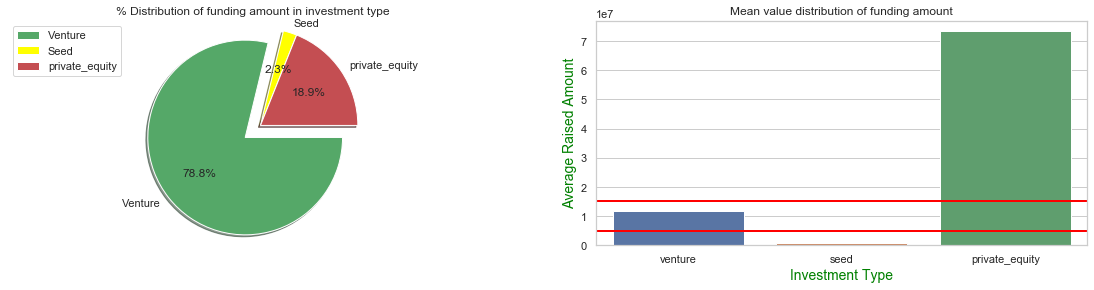

In [112]:
#Plot for showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#pie chart to show % distribution of investment in venture, seed and private equity
plt.figure(1)
plt.subplot(121)
values = [group_by_type[group_by_type['funding_round_type'] == 'venture']['sum'].values[0], group_by_type[group_by_type['funding_round_type'] == 'seed']['sum'].values[0], group_by_type[group_by_type['funding_round_type'] == 'private_equity']['sum'].values[0]]
colors = ['g', 'yellow', 'r']
labels = ['Venture', 'Seed', 'private_equity']
explode = (0.2, 0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('% Distribution of funding amount in investment type')
plt.legend(labels,loc="upper left")
plt.axis('equal')


#bar graph to show the average investment in each funding type
y_values = [group_by_type[group_by_type['funding_round_type'] == 'venture']['mean'].values[0], group_by_type[group_by_type['funding_round_type'] == 'seed']['mean'].values[0], group_by_type[group_by_type['funding_round_type'] == 'private_equity']['mean'].values[0]]

plt.subplot(122)
sns.barplot(y=y_values, x=['venture','seed','private_equity'], data=group_by_type,estimator=np.mean)
plt.title('Mean value distribution of funding amount')
plt.xlabel('Investment Type', fontsize=14, color='green')
plt.ylabel('Average Raised Amount', fontsize=14, color='green')
plt.axhline(y=5000000, color='red', linewidth=2)
plt.axhline(y=15000000, color='red', linewidth=2)
plt.subplots_adjust(left=-0.5, bottom=0.1, right= 2, top=None, wspace=0.2, hspace=0.2)

plt.show()




---

**Plot 2**

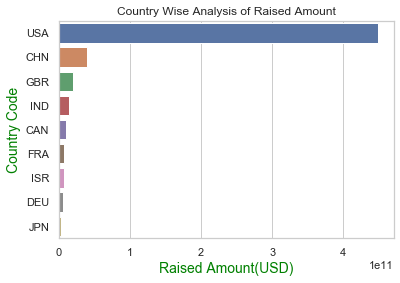

In [113]:
#Plot to shpw country Wise Analysis of Raised Amount
fig2 = sns.barplot(y="country_code", x=top9.raised_amount_usd, data=top9)
plt.title('Country Wise Analysis of Raised Amount')
plt.xlabel('Raised Amount(USD)', fontsize=14, color='green')
plt.ylabel('Country Code', fontsize=14, color='green')
plt.show()




---

**Plot 3**

In [114]:
country_1 = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
print(country_1.shape)
country_2 = D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
print(country_2.shape)
country_3 = D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]
print(country_3.shape)


(8475, 18)
(415, 18)
(224, 18)


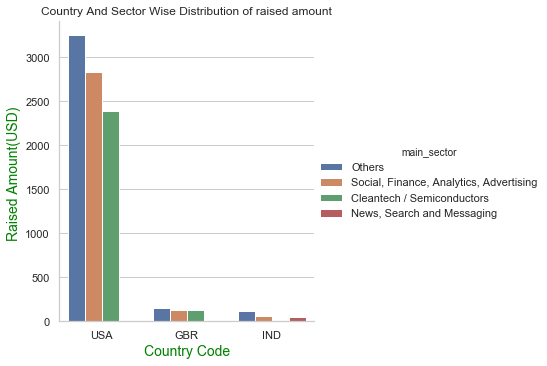

In [115]:
sns.catplot(x="country_code", y="raised_amount_usd|count", hue="main_sector", kind="bar", data=country_1.append(country_2,ignore_index=False).append(country_3,ignore_index=False))
plt.title('Country And Sector Wise Distribution of raised amount')
plt.xlabel('Country Code', fontsize=14, color='green')
plt.ylabel('Raised Amount(USD) ', fontsize=14, color='green')
plt.show()